In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import datetime

In [2]:
data_filename = "2014-2020.xlsx"
df = pd.read_excel(data_filename)

In [4]:
df["Year"] = df.apply(lambda row: int(row["Час/Дата"].split('.')[2]), axis = 1)
year_df = df.groupby(["Year"]).mean().reset_index()

,Year,AES,TEC,VDE,TES,GES,GAES_GEN,CONSUMPTION,GAES_PUMP,UK_BLR_RUS,UK_EURO,UK_MLD,Unnamed: 12
0,2014,10068.997489,1676.339155,183.377397,7831.721119,912.223059,95.872374,19702.719521,-129.920996,-296.508391,-564.605777,-74.749971,0.0
1,2015,9978.740068,1374.551826,140.974429,5737.422260,566.721233,177.495091,16938.370434,-241.580708,226.660845,-413.587100,5.957420,NaN
2,2016,9194.227459,1461.866234,124.452413,5678.454349,809.880351,184.582992,16519.612250,-248.219832,-34.095628,-453.462546,5.146972,NaN
3,2017,9739.070548,1393.614384,134.364384,5130.742352,973.967123,179.805822,16607.709817,-244.136073,-36.017580,-461.055708,-131.693836,NaN
4,2018,9629.147032,1399.659589,212.754110,5450.581279,1149.990524,178.637785,17024.187443,-241.930365,-49.447374,-594.827055,-110.245890,NaN


In [5]:
df["Day"] = df.apply(lambda row: str(row["Час/Дата"].split('-')[1]), axis = 1)
day_df = df.groupby(["Day"]).mean().reset_index()

,Day,AES,TEC,VDE,TES,GES,GAES_GEN,CONSUMPTION,GAES_PUMP,UK_BLR_RUS,UK_EURO,UK_MLD,Unnamed: 12,Year
0,01.01.2014,10480.250000,2878.541667,115.500000,6128.458333,1096.958333,115.291667,20087.583333,-132.208333,-138.000000,-400.750000,-56.458333,0.0,2014.0
1,01.01.2015,11015.000000,2583.375000,105.333333,6729.166667,489.750000,200.500000,20595.208333,-264.458333,-27.375000,-242.833333,6.750000,NaN,2015.0
2,01.01.2016,10499.000000,2376.500000,74.000000,4641.333333,440.166667,192.000000,17372.166667,-237.125000,-59.875000,-301.000000,-4.416667,NaN,2016.0
3,01.01.2017,10751.666667,2277.708333,35.375000,4602.916667,598.125000,98.000000,17127.333333,-373.875000,-26.541667,-610.541667,1.500000,NaN,2017.0
4,01.01.2018,9601.291667,2102.041667,63.416667,3665.833333,1067.458333,13.166667,15817.541667,-215.500000,-57.541667,-364.541667,-58.083333,NaN,2018.0


In [6]:
df["Month"] = df.apply(lambda row: int(row["Час/Дата"].split('.')[1]), axis = 1)
month_df = df.groupby(["Month"]).mean().reset_index()
month_df.head()

,Month,AES,TEC,VDE,TES,GES,GAES_GEN,CONSUMPTION,GAES_PUMP,UK_BLR_RUS,UK_EURO,UK_MLD,Unnamed: 12,Year
0,1,10814.698157,2403.552611,206.375768,6453.030146,945.511329,172.635177,20071.375000,-238.845016,23.827573,-529.414555,-45.248464,0.0,2017.000000
1,2,11060.191077,2303.853325,256.154461,5981.743687,965.164562,171.227483,19747.245160,-230.927189,20.981061,-567.731692,-44.848064,NaN,2017.010101
2,3,10218.318164,2058.886521,333.600422,5283.827765,1067.408410,164.065668,18112.755760,-221.153034,-1.637865,-593.248080,-42.693356,NaN,2017.000000
3,4,9212.847619,1259.795040,363.765079,5109.301190,1116.946627,165.899802,16225.305952,-225.911111,-58.882341,-490.058333,-93.112103,NaN,2017.000000
4,5,8384.303571,913.424155,313.059524,5100.884985,1065.052035,158.748848,14991.987519,-216.668779,-81.763587,-455.279816,-89.838295,NaN,2017.000000


In [7]:
df["Hour"] = df.apply(lambda row: int(row["Час/Дата"].split('-')[0]), axis = 1)
hour_df = df.groupby(["Hour"]).mean().reset_index()

In [8]:
def get_year_day(row):
    day = [int(x) for x in row["Day"].split('.')]
    return datetime.datetime(day[2], day[1], day[0]).timetuple().tm_yday
def get_season(row):
    if row["Month"] in (1,2,12):       
        return "Winter"
    elif row["Month"] in (3,4,5):       
        return "Spring"
    elif row["Month"] in (6,7,8):       
        return "Summer"
    elif row["Month"] in (9,10,11):       
        return "Autumn"
df["DayNumber"] = df.apply(get_year_day, axis=1)
dayhour_df = df[["DayNumber", "Hour", "CONSUMPTION"]].groupby(["DayNumber","Hour"]).mean().reset_index().pivot(
    index="DayNumber",columns="Hour",values="CONSUMPTION")
monthhour_df = df[["Month", "Hour", "CONSUMPTION"]].groupby(["Month","Hour"]).mean().reset_index().pivot(
    index="Month",columns="Hour",values="CONSUMPTION")
df["Season"] = df.apply(get_season, axis = 1)
seasonhour_df = df[["Season", "Hour", "CONSUMPTION"]].groupby(["Season","Hour"]).mean().reset_index().pivot(
    index="Season",columns="Hour",values="CONSUMPTION")

In [9]:
def get_week(row):
    day = [int(x) for x in row["Day"].split('.')]
    return datetime.datetime(day[2], day[1], day[0]).weekday()
df['Week'] =  df.apply(get_week, axis = 1)
week_df = df.groupby(["Week"]).mean().reset_index()

### 1. Як змінювалась структура генерації електроенергії за роками?

Для цього завдання я використав Bar Chart як спосіб візуалізації, оскільки в мене є скінченна кількість категорій, по яким необхідно здійснити порівння(роки), в кожному з яких є ще декілька пунктів для порівняння(типи станцій). Bar Chart дозволяє відобразити обидва порівняння в зрозумілому вигляді, продемонструвавши середні значення кількості згенерованої енергії кожним типом станції за рік, накласти їх один на одного, щоб пообачити різницю між різними типами та грамотно відобразити різницю по роках, використовуючи суміжні стовпчики.

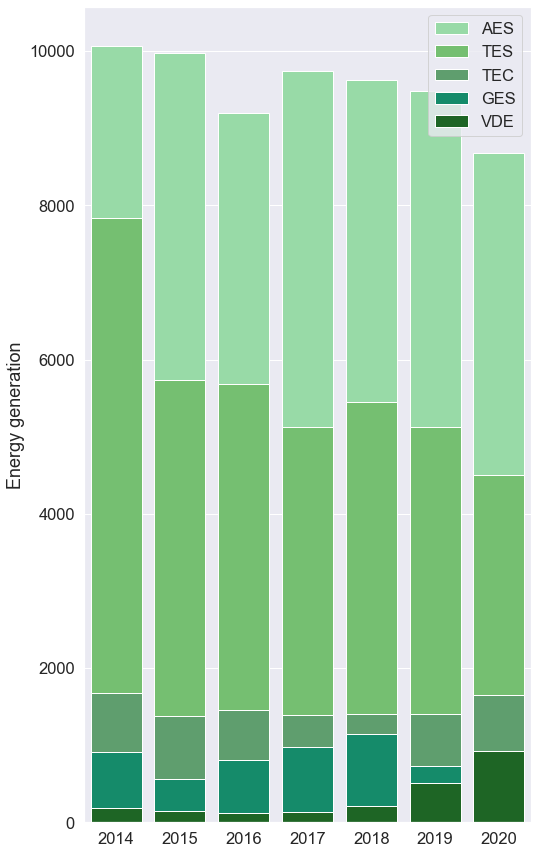

In [10]:

sns.set(rc = {'figure.figsize':(8,15)}, font_scale = 1.5)
sns.set_color_codes("pastel")
ax = sns.barplot(x=year_df["Year"],
                y=year_df["AES"], color='g', label='AES')
sns.set_color_codes("muted")
ax = sns.barplot(x=year_df["Year"],
                y=year_df["TES"], color='g', label='TES')
sns.set_color_codes("deep")
ax = sns.barplot(x=year_df["Year"],
                y=year_df["TEC"], color='g', label='TEC')
sns.set_color_codes("colorblind")
ax = sns.barplot(x=year_df["Year"],
                y=year_df["GES"], color='g', label='GES')
sns.set_color_codes("dark")
ax = sns.barplot(x=year_df["Year"],
                y=year_df["VDE"], color='g', label='VDE')
ax.legend()
ax.set(ylabel="Energy generation",
       xlabel="")
plt.show()

###  2. Як залежить споживання електроенергії від дня року та години доби?

Для цього завдання я використовував Heatmap, оскільки таким чином можна зрозуміло продемонструвати тривимірний набір значень(день, година та споживання енергії).

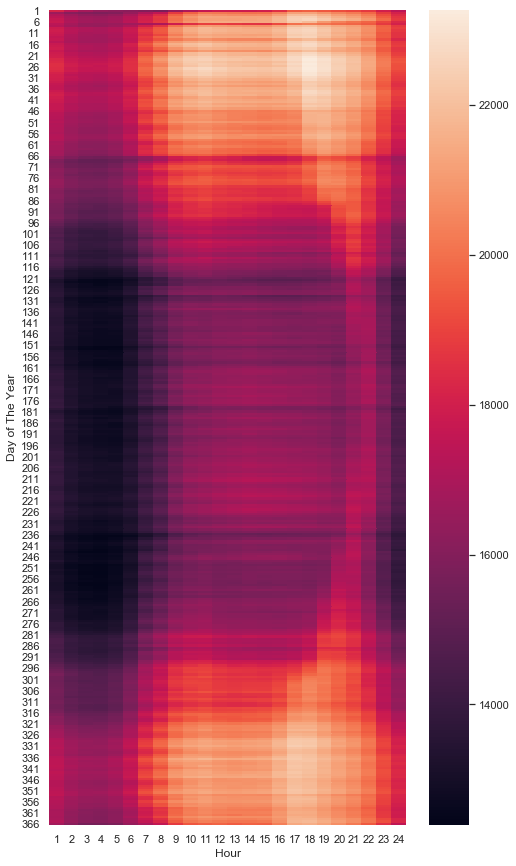

In [11]:
sns.set(rc = {'figure.figsize':(8,15)})
ax = sns.heatmap(dayhour_df)
ax.set(ylabel="Day of The Year")
plt.show()

### 3. Як змінюється генерація електроенергії з різних джерел впродовж доби?

Для цього завдання я використав Radar Plot як спосіб візуалізації, оскільки дані хоч і представлені в схожому до першого завдання форматі, категорій по осі Х є дещо більше, а також дані резонно відображати у вигляді замкнутого кругового графіку, так як часові рамки є циклічними(години дня).

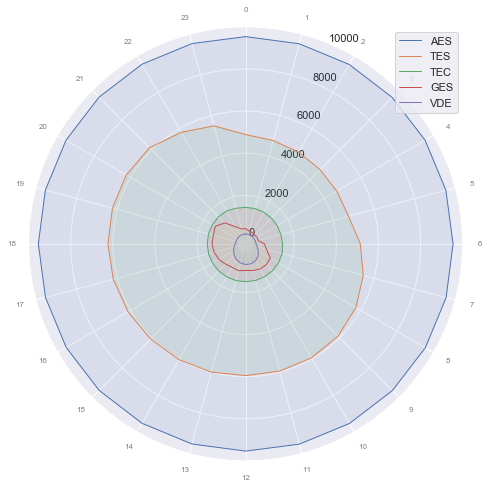

In [21]:
sns.set(font_scale = 1)
angles = [n / 24 * 2 * math.pi for n in range(24)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(math.pi/2.0)
plt.xticks(angles[:-1], [x-1 for x in hour_df["Hour"]], color='grey', size=8)
 
ax.plot(angles, [*hour_df["AES"], hour_df["AES"][0]], linewidth=1, linestyle='solid', label="AES")
ax.fill(angles, [*hour_df["AES"], hour_df["AES"][0]], 'b', alpha=0.1)

ax.plot(angles, [*hour_df["TES"], hour_df["TES"][0]], linewidth=1, linestyle='solid', label="TES")
ax.fill(angles, [*hour_df["TES"], hour_df["TES"][0]], 'g', alpha=0.1)

ax.plot(angles, [*hour_df["TEC"], hour_df["TEC"][0]], linewidth=1, linestyle='solid', label="TEC")
ax.fill(angles, [*hour_df["TEC"], hour_df["TEC"][0]], 'r', alpha=0.1)

ax.plot(angles, [*hour_df["GES"], hour_df["GES"][0]], linewidth=1, linestyle='solid', label="GES")
ax.fill(angles, [*hour_df["GES"], hour_df["GES"][0]], 'y', alpha=0.1)

ax.plot(angles, [*hour_df["VDE"], hour_df["VDE"][0]], linewidth=1, linestyle='solid', label="VDE")
ax.fill(angles, [*hour_df["VDE"], hour_df["VDE"][0]], 'c', alpha=0.1)
ax.legend()
plt.show()

### 4. Як змінюється споживання електроенергії впродовж доби у розрізі місяців року та пір року?


Для цього завдання я використовував Heatmap, оскільки таким чином можна зрозуміло продемонструвати тривимірний набір значень(місяць/пора року, година та споживання енергії(усереднене значення впродовж дня за обраний проміжок часу)).

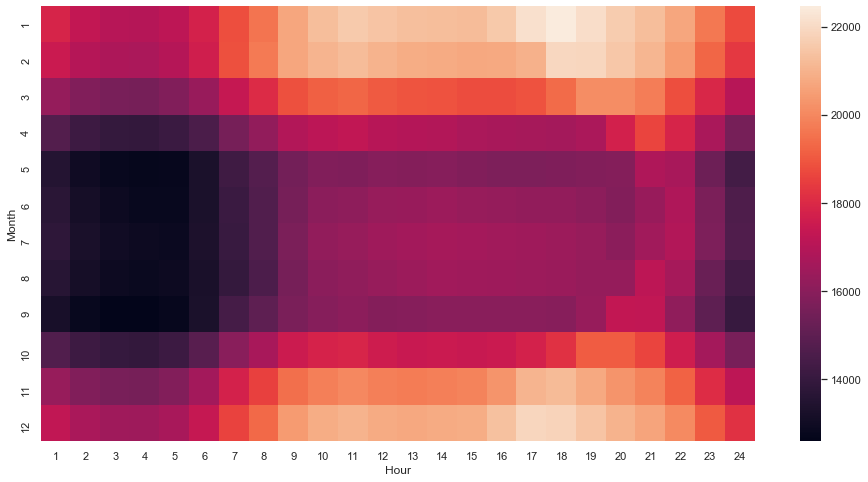

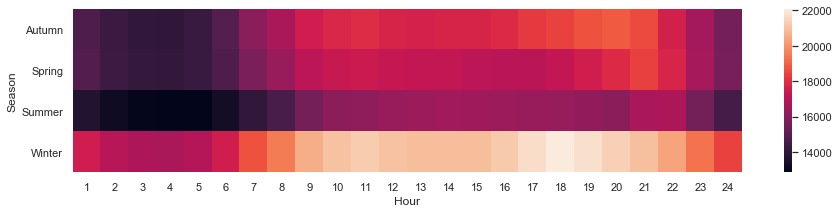

In [22]:
sns.set(rc = {'figure.figsize':(16,8)})
ax = sns.heatmap(monthhour_df)
plt.show()

sns.set(rc = {'figure.figsize':(15,3)})
ax = sns.heatmap(seasonhour_df)
plt.show()

### 5. Як змінюється споживання електроенергії впродовж тижня?

Для цього завдання я аналогічно 3-ому завданню використав Radar Plot, оскільки тут часові рамки також є циклічними(дні тижня).

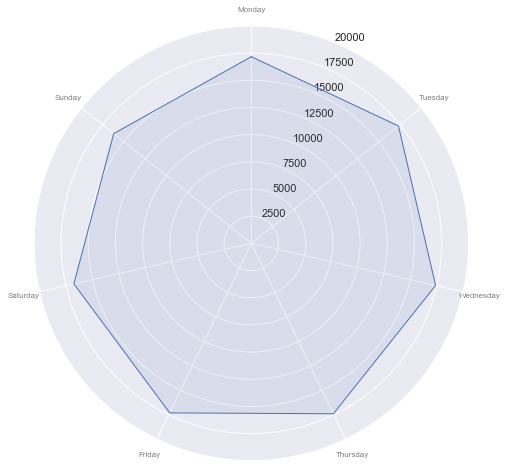

In [19]:
sns.set(rc = {'figure.figsize':(8,8)}, font_scale = 1)
angles = [n / 7 * 2 * math.pi for n in range(7)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(math.pi/2.0)
plt.xticks(angles[:-1], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "Monday"], color='grey', size=8)
 
ax.plot(angles, [*week_df["CONSUMPTION"], week_df["CONSUMPTION"][0]], linewidth=1, linestyle='solid')
ax.fill(angles, [*week_df["CONSUMPTION"], week_df["CONSUMPTION"][0]], 'b', alpha=0.1)
ax.set(ylim=(0,20000))
plt.show()